In [150]:
import numpy as np
import pandas as pd
import pandas as pd

In [151]:
df = pd.read_csv("train.csv")

In [152]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [153]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [154]:
df = df.fillna('')

In [155]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
id        0
title     0
author    0
text      0
label     0
dtype: int64


In [156]:
print(df.describe())

                 id         label
count  20800.000000  20800.000000
mean   10399.500000      0.500625
std     6004.587135      0.500012
min        0.000000      0.000000
25%     5199.750000      0.000000
50%    10399.500000      1.000000
75%    15599.250000      1.000000
max    20799.000000      1.000000


In [157]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [158]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

# Word count
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
print(df[['title', 'text', 'title_length', 'text_length', 'title_word_count', 'text_word_count']].head())

                                               title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   

                                                text  title_length  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...            81   
1  Ever get the feeling your life circles the rou...            55   
2  Why the Truth Might Get You Fired October 29, ...            33   
3  Videos 15 Civilians Killed In Single US Airstr...            63   
4  Print \nAn Iranian woman has been sentenced to...            93   

   text_length  title_word_count  text_word_count  
0         4930                14              820  
1         4160                 9              710  
2         7692                 7             1266  
3         3237                10  

In [159]:
df['author'].value_counts()  # Count articles per author

,count
author,
,1957
Pam Key,243
admin,193
Jerome Hudson,166
Charlie Spiering,141
...,...
Jeremy R. Hammond,1
Vic Bishop,1
Douglas Martin,1


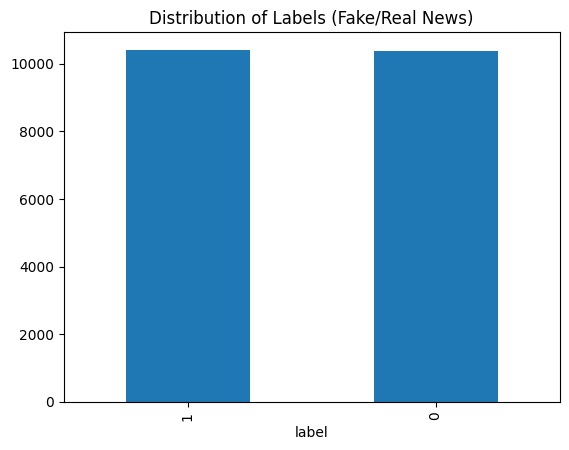

In [160]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels (Fake/Real News)')
plt.show()

In [161]:
#text preprocessing
import re
df['cleaned_title'] = df['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
print(df[['title', 'cleaned_title', 'text', 'cleaned_text']].head())

                                               title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   

                                       cleaned_title  \
0  house dem aide we didnt even see comeys letter...   
1  flynn hillary clinton big woman on campus  bre...   
2                  why the truth might get you fired   
3  15 civilians killed in single us airstrike hav...   
4  iranian woman jailed for fictional unpublished...   

                                                text  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  Ever get the feeling your life circles the rou...   
2  Why the Truth Might Get You Fired October 29, ...   
3  Videos 15 Civilians Killed In Single US Airstr...   
4  Print \nAn Iranian woman has been sentenced

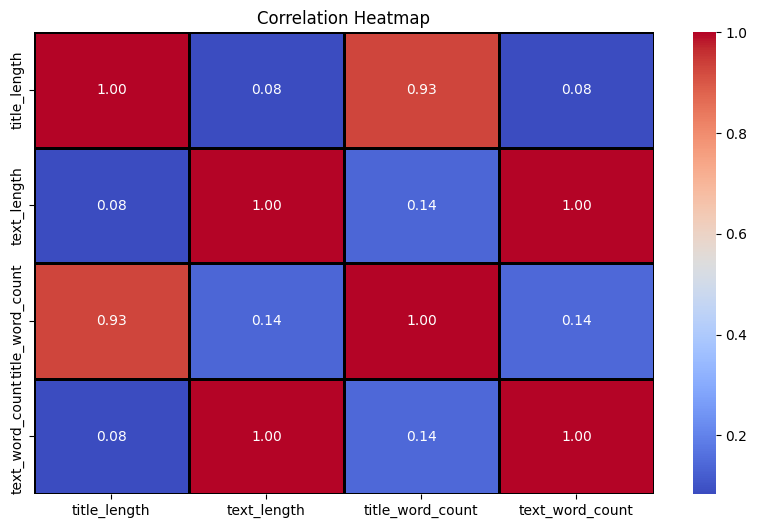

In [162]:
import seaborn as sns
plt.figure(figsize=(10, 6))
corr = df[['title_length', 'text_length', 'title_word_count', 'text_word_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


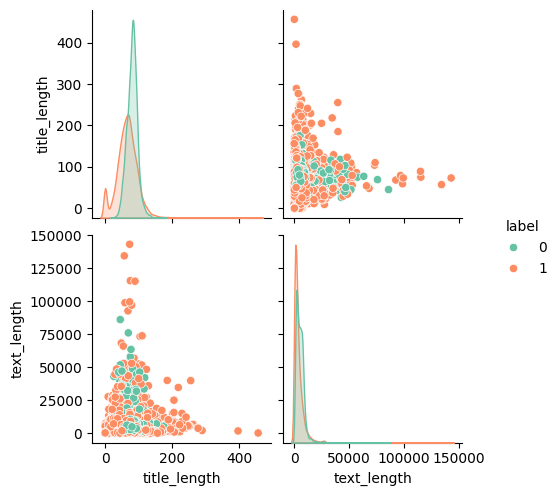

In [163]:
sns.pairplot(df[['title_length', 'text_length', 'label']], hue='label', palette='Set2')
plt.show()


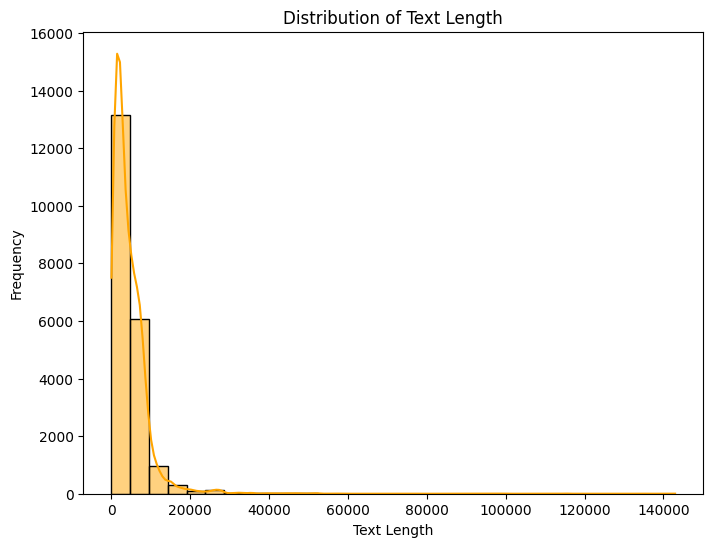

In [164]:
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [165]:
#Text Normalization (Stemming)

In [166]:
import nltk
from nltk.stem import PorterStemmer
# Initialize the PorterStemmer
stemmer = PorterStemmer()
def stem_text(text):
    words = text.split()
    return ' '.join([stemmer.stem(word) for word in words])
df['stemmed_title'] = df['cleaned_title'].apply(stem_text)
df['stemmed_text'] = df['cleaned_text'].apply(stem_text)
print(df[['title', 'cleaned_title', 'stemmed_title', 'text', 'cleaned_text', 'stemmed_text']].head())


                                               title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                  Why the Truth Might Get You Fired   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   

                                       cleaned_title  \
0  house dem aide we didnt even see comeys letter...   
1  flynn hillary clinton big woman on campus  bre...   
2                  why the truth might get you fired   
3  15 civilians killed in single us airstrike hav...   
4  iranian woman jailed for fictional unpublished...   

                                       stemmed_title  \
0  hous dem aid we didnt even see comey letter un...   
1  flynn hillari clinton big woman on campu breit...   
2                   whi the truth might get you fire   
3  15 civilian kill in singl us airstrik have bee...   
4  iranian woman jail for fiction unpublish st

In [167]:
#Logistic Regression

In [206]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [207]:
df['content'] = df['author'] + ' ' + df['stemmed_title'] + ' ' + df['stemmed_text']

In [208]:
X = df['content']
Y = df['label']

In [209]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.5, stratify=Y, random_state=4)

In [211]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [212]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Confusion Matrix:
[[4859  335]
 [ 194 5012]]

Accuracy: 0.9491346153846154
Precision: 0.9373480456330653
Recall: 0.9627353054168267


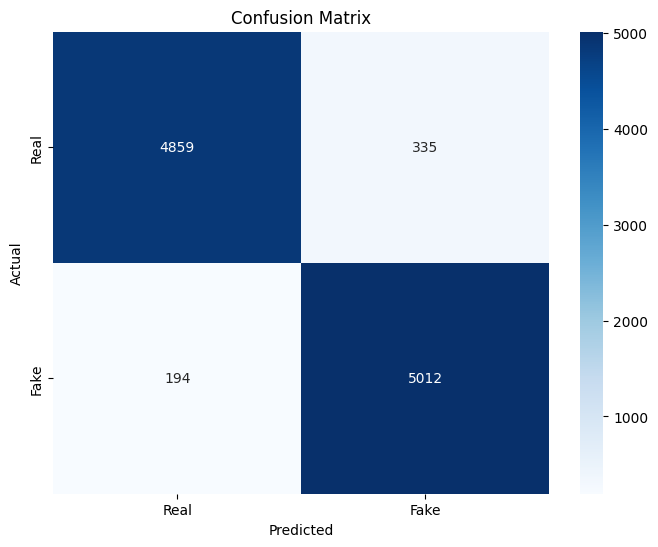

In [213]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

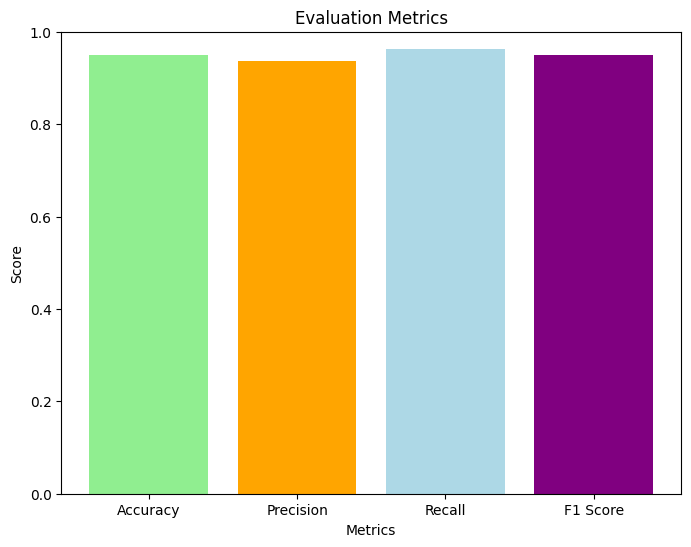

In [214]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['lightgreen', 'orange', 'lightblue', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()


In [203]:
#Naive Bayes Classifier

In [215]:
model = MultinomialNB()  # Using Multinomial Naive Bayes for text classification
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [216]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Confusion Matrix:
[[5169   25]
 [1800 3406]]

Accuracy: 0.8245192307692307
Precision: 0.992713494607986
Recall: 0.6542451018056089
F1 Score: 0.7886997800162093


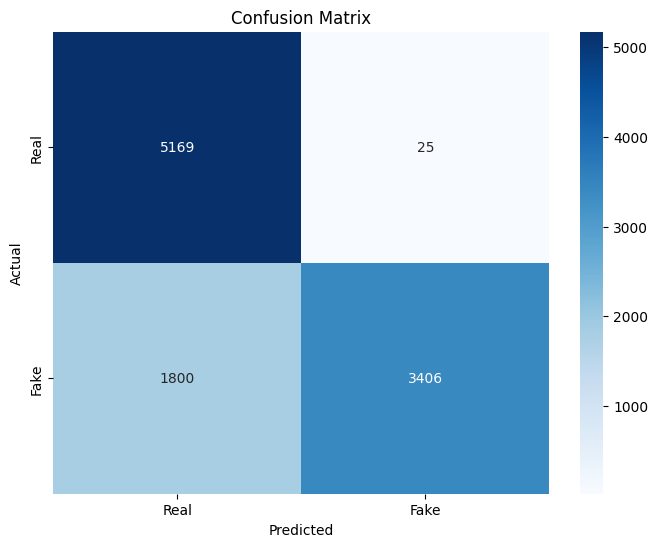

In [217]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

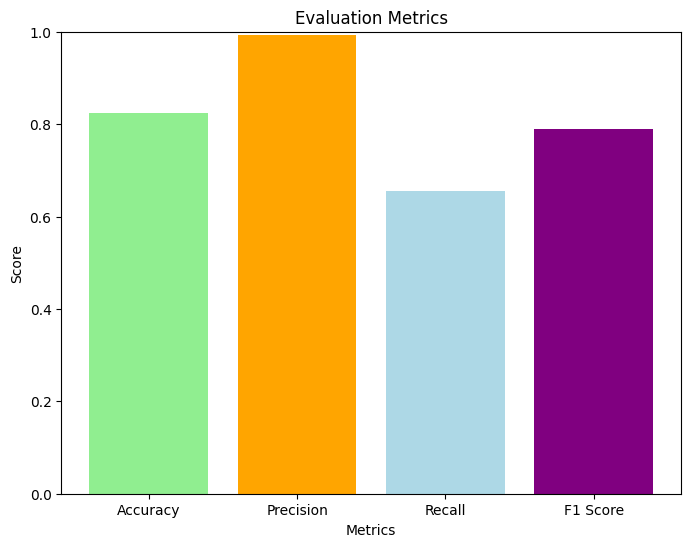

In [218]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['lightgreen', 'orange', 'lightblue', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

In [ ]:
#svm classification

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv("train.csv")  # Replace with your dataset file
# Assume dataset has 'text' (news content) and 'label' (1 for fake, 0 for real) columns

# Step 2: Preprocessing
data = data.dropna()  # Remove null values
X = data['text']  # News content
y = data['label']  # Labels

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate Model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.9423024336888159

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2082
           1       0.94      0.92      0.93      1575

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



In [202]:
def predict_news(news_text):
    news_tfidf = vectorizer.transform([news_text])  # Vectorize input
    prediction = model.predict(news_tfidf)  # Predict
    return "Fake" if prediction[0] == 1 else "Real"

# Test Prediction
news = "Wells Fargo Chief Abruptly Steps Down - The New York Times"
print("News Prediction:", predict_news(news))

News Prediction: Real


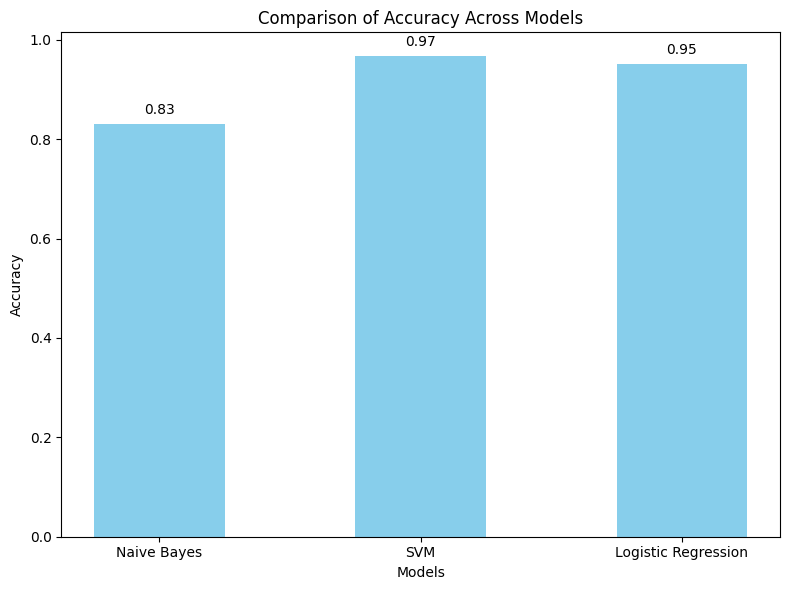

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their corresponding accuracy scores
models = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracy = [0.8299038461538462, 0.9666346153846154, 0.9503846153846154]

# Set positions for the bars
x = np.arange(len(models))

# Width of the bars
width = 0.5

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, accuracy, width, color='skyblue')

# Add labels, title, and x-tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Annotate each bar with the accuracy value
for i in range(len(models)):
    ax.annotate(f'{accuracy[i]:.2f}',
                xy=(x[i], accuracy[i]),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

